In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

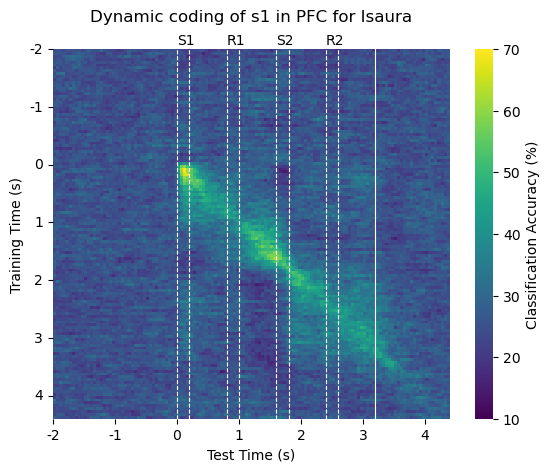

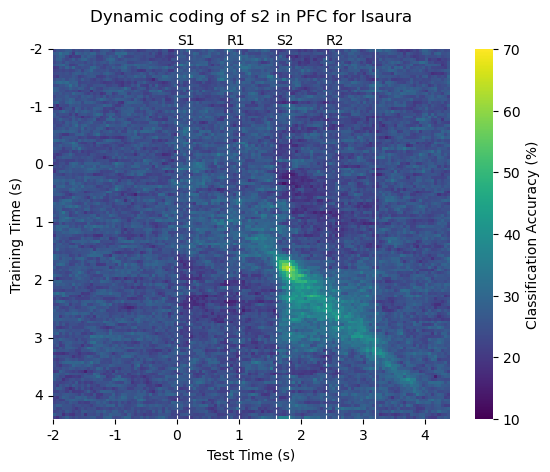

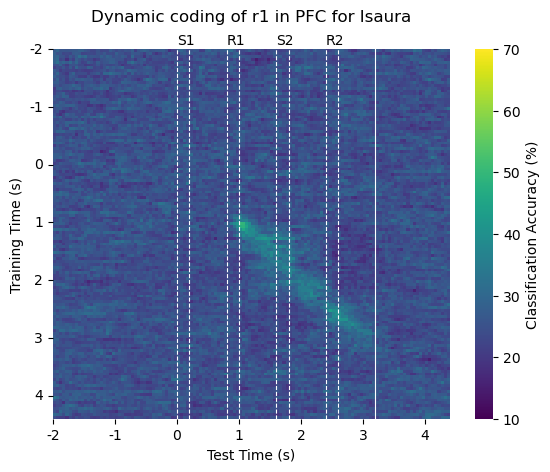

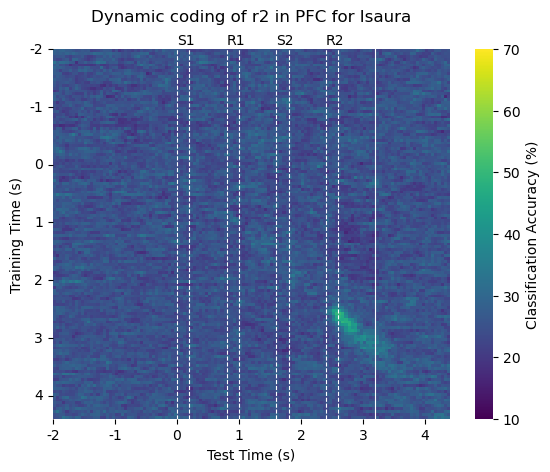

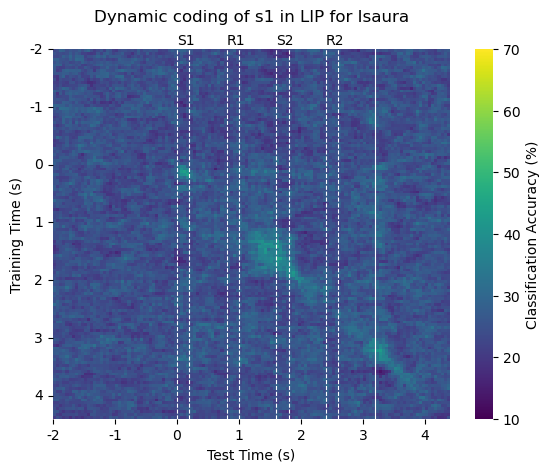

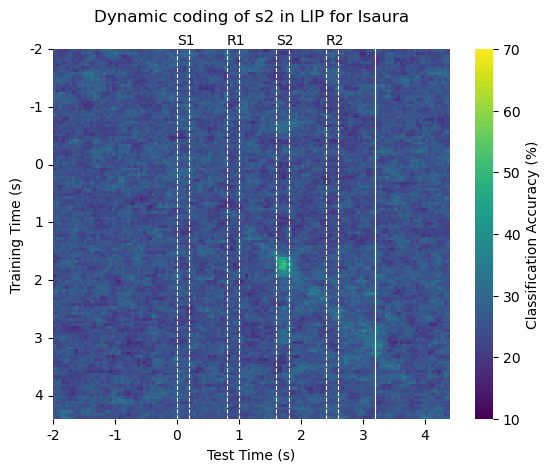

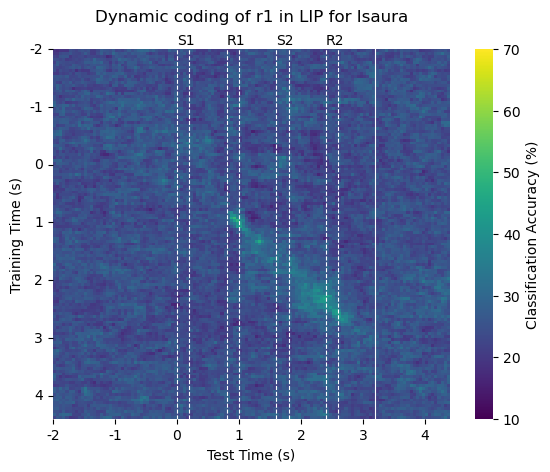

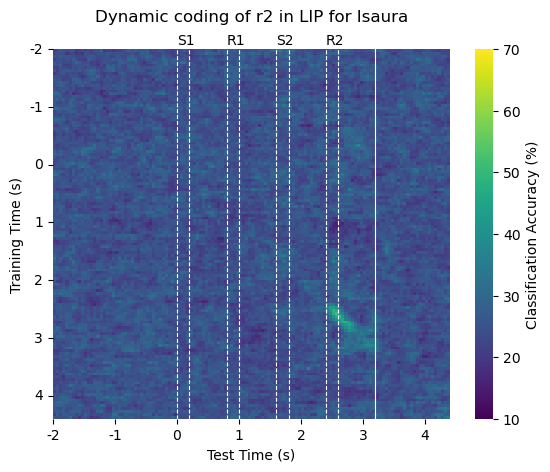

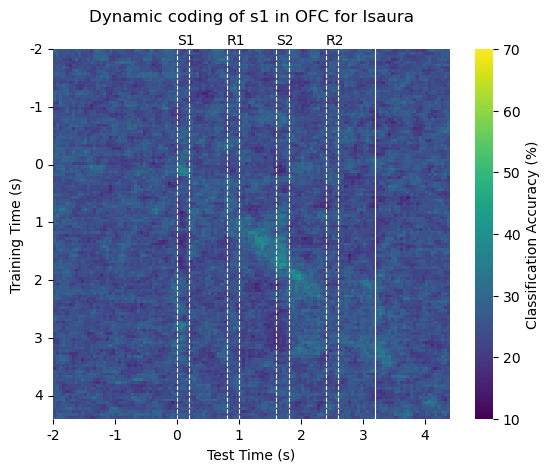

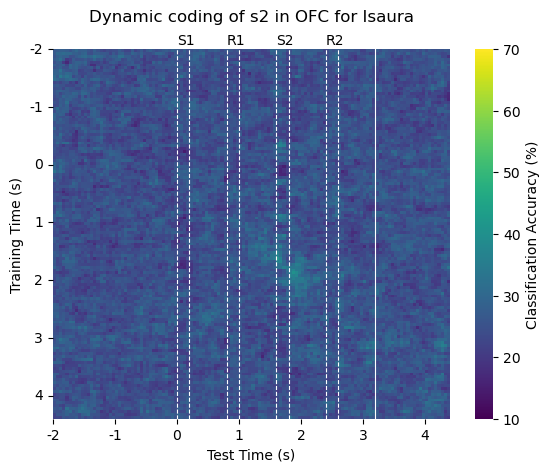

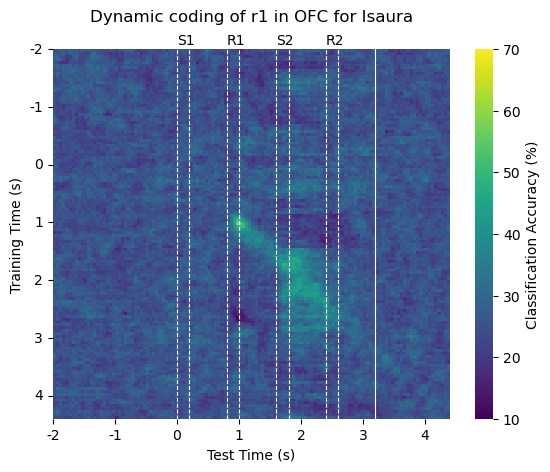

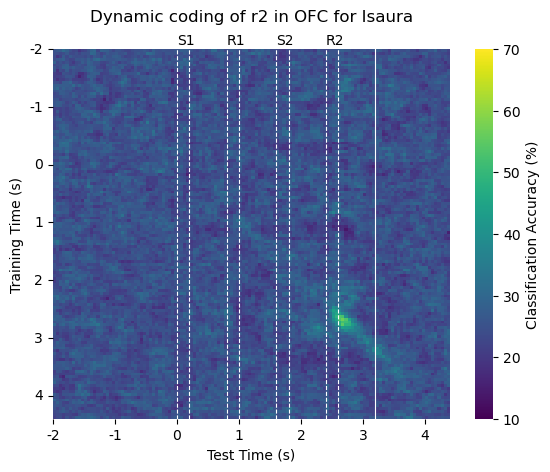

In [12]:
'''
plot cross-temporal decoding results in a heatmap
'''

information = ['s1', 's2', 'r1', 'r2']
areas = ['PFC', 'LIP', 'OFC']

for area in areas:
    for type in information: 
        fig, ax = plt.subplots()
        data = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dydec_result/ISA/ISA_{type}_{area}_LDA_accuracy.npz')['accuracy']
        sns.heatmap(np.mean(data, axis=-1)*100, ax=ax, cmap='viridis', vmin=10, vmax=70, cbar_kws={'label':'Classification Accuracy (%)'})
        ax.set_xticks(np.arange(0, 128, 20))
        ax.set_xticklabels(np.arange(-2, 5, 1), rotation=0)
        ax.set_yticks(np.arange(0, 128, 20))
        ax.set_yticklabels(np.arange(-2, 5, 1), rotation=0)
        # add vlines
        ax_b, ax_t = ax.get_ylim()
        ax_vlines = [40, 44, 56, 60, 72, 76, 88, 92]
        vline_text = ['S1', 'R1', 'S2', 'R2']
        ax.vlines(x=ax_vlines, ymin=ax_b, ymax=ax_t, linestyle='--', colors='white', lw=0.8)
        ax.axvline(x=104, ymin=ax_b, ymax=ax_t, color='white', lw=0.8)
        for i in range(len(vline_text)):
            plt.text(ax_vlines[i*2], ax_t-3, vline_text[i], verticalalignment='center')
        ax.set_title(f'Dynamic coding of {type} in {area} for Isaura', pad=20)
        ax.set_xlabel('Test Time (s)')
        ax.set_ylabel('Training Time (s)')
        fig.savefig(f'/om/user/huidili/wmUpdate/150b50s_decode/plots/dydec/ISA/ISA_{type}_{area}_LDA_dydec.png')

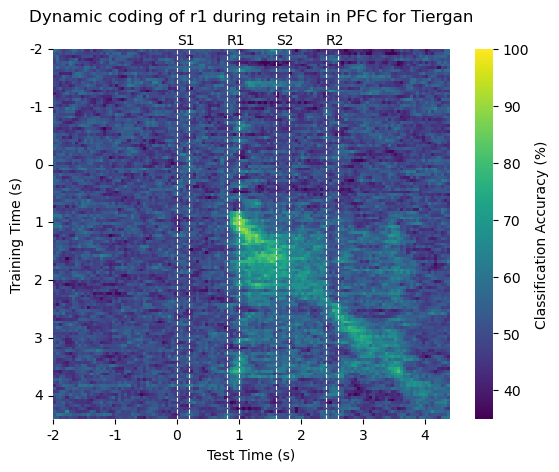

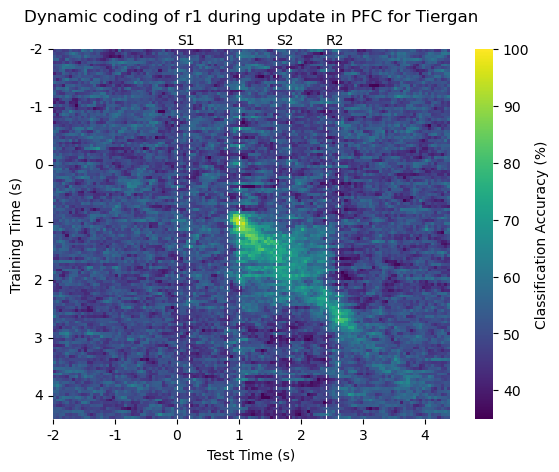

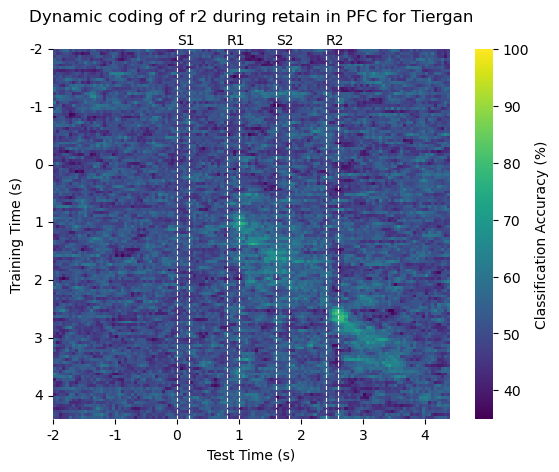

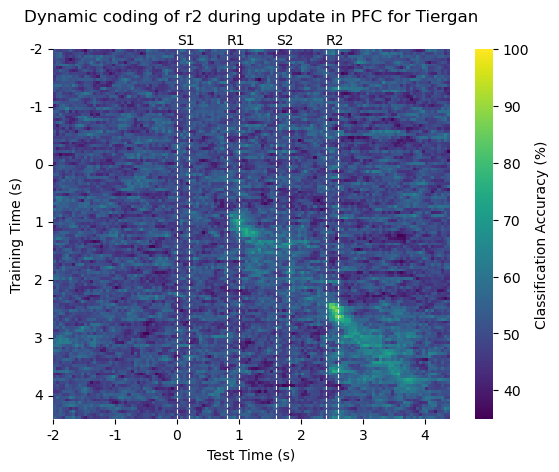

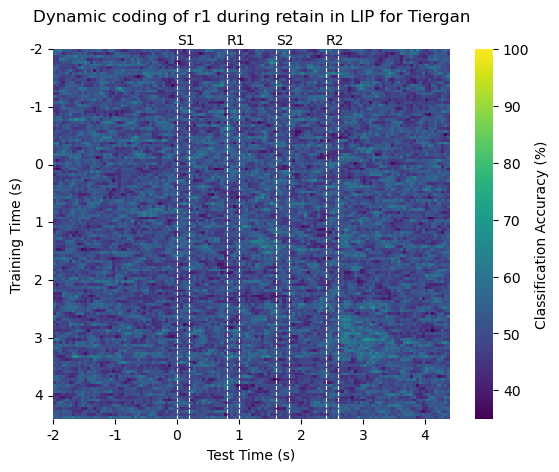

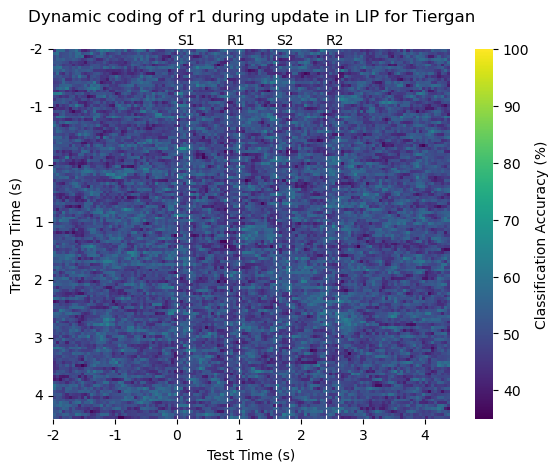

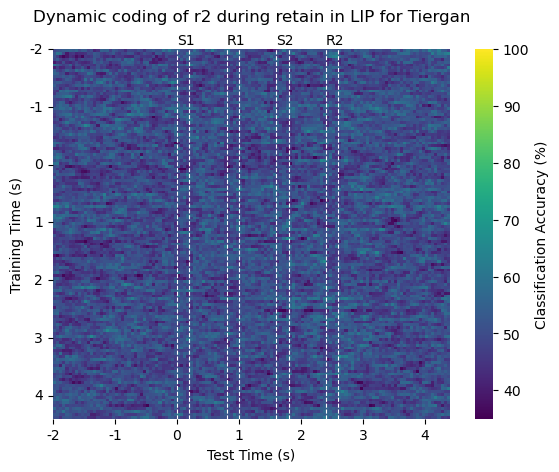

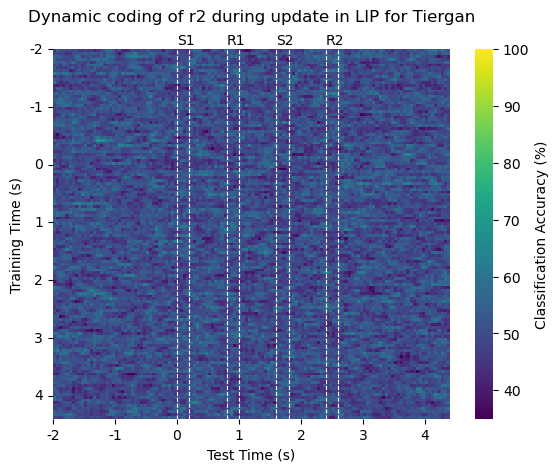

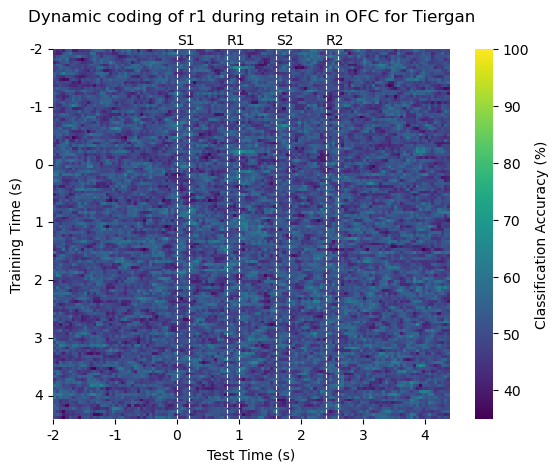

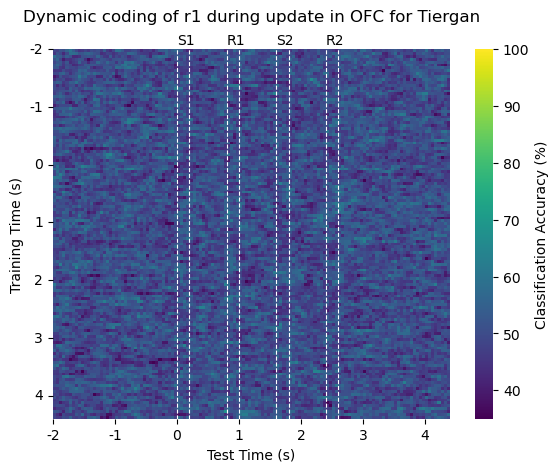

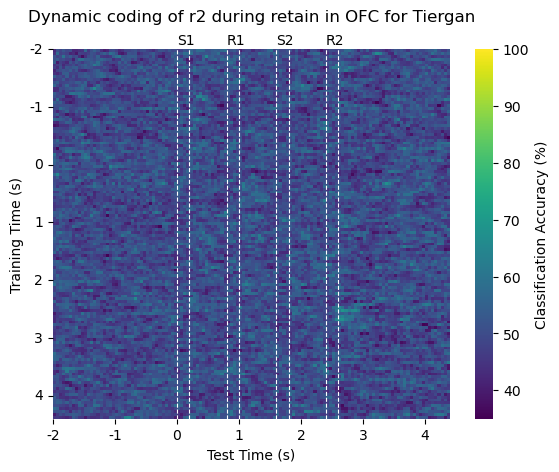

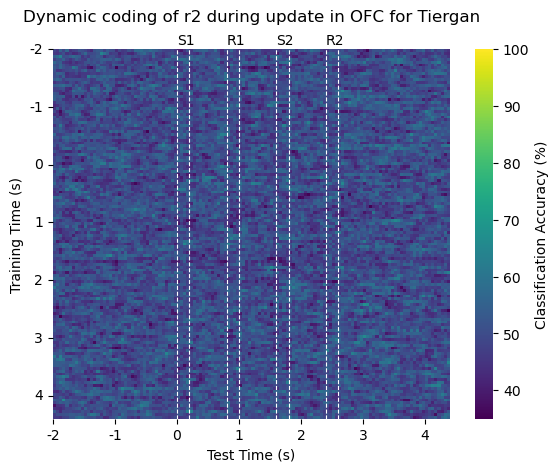

In [6]:
areas = ['PFC', 'LIP', 'OFC']
information = ['r1', 'r2']
conditions = ['retain', 'update']

for area in areas:
    for type in information: 
        for condition in conditions: 
            fig, ax = plt.subplots()
            data = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dydec_result/conditions/Tir_{type}_{area}_{condition}_LDA_accuracy.npz')['accuracy']
            sns.heatmap(np.mean(data, axis=-1)*100, ax=ax, cmap='viridis', vmin=35, vmax=100, cbar_kws={'label':'Classification Accuracy (%)'})
            ax.set_xticks(np.arange(0, 128, 20))
            ax.set_xticklabels(np.arange(-2, 5, 1), rotation=0)
            ax.set_yticks(np.arange(0, 128, 20))
            ax.set_yticklabels(np.arange(-2, 5, 1), rotation=0)
            # add vlines
            ax_b, ax_t = ax.get_ylim()
            ax_vlines = [40, 44, 56, 60, 72, 76, 88, 92]
            vline_text = ['S1', 'R1', 'S2', 'R2']
            ax.vlines(x=ax_vlines, ymin=ax_b, ymax=ax_t, linestyle='--', colors='white', lw=0.8)
            for i in range(len(vline_text)):
                plt.text(ax_vlines[i*2], ax_t-3, vline_text[i], verticalalignment='center')
            ax.set_title(f'Dynamic coding of {type} during {condition} in {area} for Tiergan', pad=20)
            ax.set_xlabel('Test Time (s)')
            ax.set_ylabel('Training Time (s)')
            fig.savefig(f'/om/user/huidili/wmUpdate/150b50s_decode/plots/dydec/conditions_rewards/Tir_{type}_{area}_{condition}_LDA_dydec.png')